Machine Learning Pipeline for Housing Price Prediction

This script loads housing data, 
preprocesses features, traind linear 
and polynomial regression models, and 
evaluates their performance. the code 
follows best practices for readability and maintainability.

In [841]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Data Loading and Inspection

In [ ]:
# Load dataset
print('Initial datset preview:')
df = pd.read_csv("house.csv")
df.head())

Initial datset preview:


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [843]:
# Display basic statictics
print("Dataset Statistics:")
df.dtypes

Dataset Statistics:


Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

Compare Prices between Different areas in Tehran

to compare house prices between different areas of Tehran, The address have been replaced with their area number(22 main areas and 0 as the nearby area around Tehran) and then visualized for better comparison.

In [844]:
Add_to_number = {
    'Shahran': 5,'Pardis': 0,'Shahrake Qods': 2,'Shahrake Gharb': 2,'Yakhchiabad': 16,
    'North Program Organization': 0,'Andisheh': 0,'West Ferdows Boulevard': 5,
    'Narmak': 8,'Saadat Abad': 2,'Zafar': 3,'Islamshahr': 0,'Pirouzi': 13,
    'Shahrake Shahid Bagheri': 4,'Moniriyeh': 11,'Velenjak': 1,'Amirieh': 12,
    'Southern Janatabad': 5,'Salsabil': 10,'Zargandeh': 3,'Feiz Garden': 0,
    'Water Organization': 0,'ShahrAra': 2,'Gisha': 2,'Ray': 20,'Abbasabad': 7,
    'Ostad Moein': 9,'Farmanieh': 1,'Parand': 0,'Punak': 5,'Qasr-od-Dasht': 0,
    'Aqdasieh': 1,'Pakdasht': 0,'Railway': 16,'Central Janatabad': 5,
    'East Ferdows Boulevard': 5,'Pakdasht KhatunAbad': 0,'Sattarkhan': 2,
    'Baghestan': 0,'Shahryar': 0,'Northern Janatabad': 5,'Daryan No': 1,
    'Southern Program Organization': 0,'Rudhen': 0,'West Pars': 4,'Afsarieh': 15,
    'Marzdaran': 2,'Dorous': 3,'Sadeghieh': 5,'Chahardangeh':0,'Bagershahr': 20,
    'Jeyhoon': 10,'Lavizan': 4,'Shams Abad': 4,'Fatemi': 6,'Keshavarz Boulevard': 6,
    'Kahrizak': 0,'Qarchak': 0,'Northren Jamalzadeh': 6,'Azarbaijan': 10,'Bahar': 7,
    'Persian Gulf Martyrs Lake': 22,'Beryanak': 10,'Heshmatieh': 7,'Elm-o-Sanat': 4,
    'Golestan': 0,'Shahr-e-Ziba': 5,'Pasdaran': 3,'Chardivari': 0,'Gheitarieh': 1,
    'Kamranieh': 1,'Gholhak': 3,'Heravi': 4,'Hashemi': 10,'Dehkade Olampic': 22,
    'Damavand': 0,'Republic': 11,'Zaferanieh': 1,'Qazvin Imamzadeh Hassan': 17,
    'Niavaran': 1,'Valiasr': 6,'Qalandari': 0,'Amir Bahador': 11,'Ekhtiarieh': 3,
    'Ekbatan': 5,'Absard': 0,'Haft Tir': 6,'Mahallati': 1,'Ozgol': 1,'Tajrish': 1,
    'Abazar': 5,'Koohsar': 5,'Hekmat': 1,'Parastar': 0,'Lavasan': 0,'Majidieh': 4,
    'Southern Chitgar': 22,'Karimkhan': 6,'Si Metri Ji': 10,'Karoon': 10,
    'Northern Chitgar': 22,'East Pars': 4,'Kook': 0,'Air force': 13,'Sohanak': 1,
    'Komeil': 10,'Azadshahr': 5,'Zibadasht': 0,'Amirabad': 6,'Dezashib': 1,'Elahieh': 1,
    'Mirdamad': 3,'Razi': 11,'Jordan': 3,'Mahmoudieh': 1,'Shahedshahr': 0,'Yaftabad': 17,
    'Mehran': 0,'Nasim Shahr': 0,'Tenant': 0,'Chardangeh': 0,'Fallah': 17,'Eskandari': 10,
    'Shahrakeh Naft': 1,'Ajudaniye': 1,'Tehransar': 21,'Nawab': 10,'Yousef Abad': 6,
    'Northern Suhrawardi': 7,'Villa': 6,'Hakimiyeh': 4,'Nezamabad': 14,'Garden of Saba': 6,
    'Tarasht': 2,'Azari': 17,'Shahrake Apadana': 5,'Araj': 4,'Vahidieh': 14,'Malard': 0,
    'Shahrake Azadi': 5,'Darband': 1,'Vanak': 3,'Tehran Now': 13,'Darabad': 1,'Eram': 18,
    'Atabak': 15,'Sabalan': 7,'SabaShahr': 0,'Shahrake Madaen': 15,'Waterfall': 0,'Ahang': 14,
    'Salehabad': 19,'Pishva': 0,'Enghelab': 11,'Islamshahr Elahieh': 0,'Ray - Montazeri': 20,
    'Firoozkooh Kuhsar': 0,'Ghoba': 3,'Mehrabad': 9,'Southern Suhrawardi': 7,'Abuzar': 17,
    'Dolatabad': 20,'Hor Square': 10,'Taslihat': 0,'Kazemabad': 0,'Robat Karim': 0,
    'Ray - Pilgosh': 20,'Ghiyamdasht': 0,'Telecommunication': 0,'Mirza Shirazi': 6,'Gandhi': 3,
    'Argentina': 6,'Seyed Khandan': 7,'Shahrake Quds': 22,'Safadasht': 0,'Khademabad Garden': 0,
    'Hassan Abad': 11,'Chidz': 1,'Khavaran': 15,'Boloorsazi': 0,'Mehrabad River River': 0,
    'Varamin - Beheshti': 0,'Shoosh': 15,'Thirteen November': 0,'Darakeh': 1,'Aliabad South': 16,
    'Alborz Complex': 0,'Firoozkooh': 0,'Vahidiyeh': 0,'Shadabad': 18,'Naziabad': 16,'Javadiyeh': 16,
}
df2 = df.copy() # get a copy of our main data frame
df2['Address'] = df['Address'].map(Add_to_number)

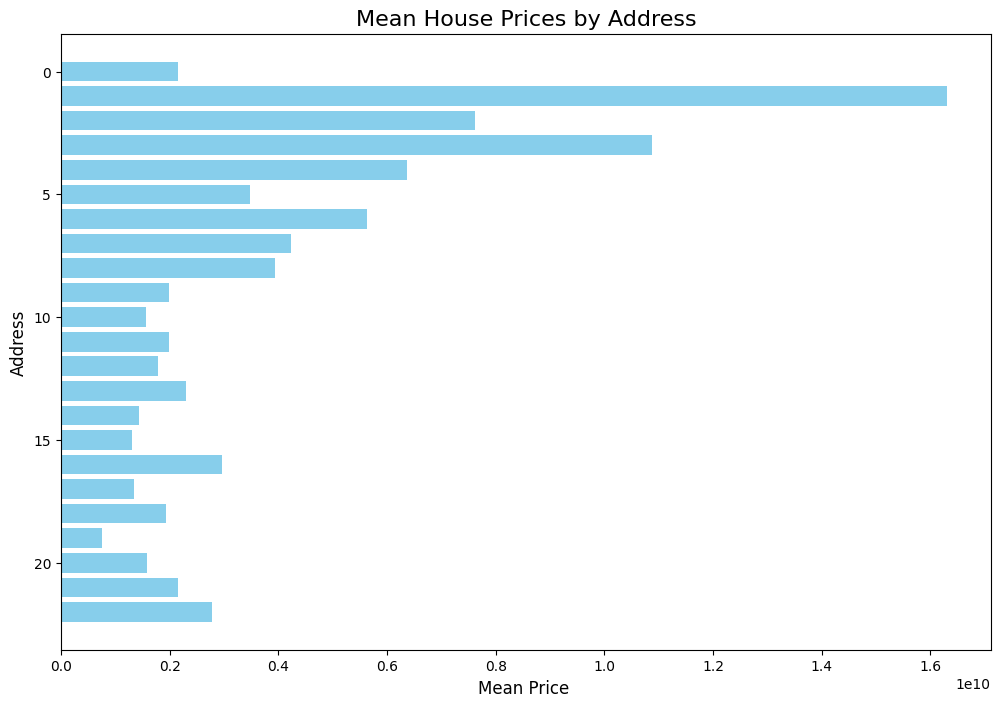

In [845]:
# calculate the mean of each house erea prices
mean_prices = df2.groupby('Address')['Price'].mean().reset_index() 
mean_prices_sorted = mean_prices.sort_values(by='Price', ascending=False)
mean_prices_sorted

plt.figure(figsize=(12, 8))
plt.barh(mean_prices_sorted['Address'], mean_prices_sorted['Price'], color='skyblue')
plt.xlabel('Mean Price ', fontsize=12)
plt.ylabel('Address', fontsize=12)
plt.title('Mean House Prices by Address', fontsize=16)
plt.gca().invert_yaxis()

plt.show()

Data Preprocessing

In [846]:
dfc = df.dropna() # removing NAs
dfc = dfc.replace({True:1, False:0}) # replacing True/False with binary numbers
dfc.head()

/var/folders/h7/k41ml98x2vzclpq5z9m3ptb00000gn/T/ipykernel_6400/2916145006.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc = dfc.replace({True:1, False:0}) # replacing True/False with binary numbers


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [847]:
# Numerize the Addresses and sort them by the mean price of each Address
meanprice = dfc.groupby('Address')['Price'].mean().sort_values(ascending=True)

# Addresses with more expensive prices have bigger prices
Address = {Address: label for label, Address in enumerate(meanprice.index, start=1)}
dfc['Address'] = dfc['Address'].map(Address)
dfc.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,99,1.850000e+09,61666.67
1,60,1,1,1,1,99,1.850000e+09,61666.67
2,79,2,1,1,1,16,5.500000e+08,18333.33
3,95,2,1,1,1,27,9.025000e+08,30083.33
4,123,2,1,1,1,175,7.000000e+09,233333.33


In [848]:
# Cleaning Area columns and removing outlier items
dfc['Area'] = dfc['Area'].str.strip().str.replace(',', '').astype(float)
dfc = dfc[dfc['Area'] <= 500.0] 

In [849]:
dfc.describe()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3.433000e+03,3.433000e+03
mean,104.018060,2.074279,0.847364,0.915234,0.790271,106.210894,5.212296e+09,1.737432e+05
std,55.595229,0.748359,0.359689,0.278573,0.407175,52.983145,7.404752e+09,2.468251e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.600000e+06,1.200000e+02
25%,68.000000,2.000000,1.000000,1.000000,1.000000,71.000000,1.400000e+09,4.666667e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,105.000000,2.850000e+09,9.500000e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,162.000000,6.000000e+09,2.000000e+05
max,500.000000,5.000000,1.000000,1.000000,1.000000,192.000000,9.240000e+10,3.080000e+06


In [850]:
# Standardize features
numeric_cols =['Area','Room', 'Parking', 'Warehouse', 'Elevator', 'Price','Address', 'Price(USD)']
scaler = StandardScaler()
dfc[numeric_cols] = scaler.fit_transform(dfc[numeric_cols])
dfc.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,-0.737906,-1.435723,0.424418,0.304329,0.515159,-0.136118,-0.454139,-0.454139
1,-0.791875,-1.435723,0.424418,0.304329,0.515159,-0.136118,-0.454139,-0.454139
2,-0.450069,-0.099270,0.424418,0.304329,0.515159,-1.702882,-0.629727,-0.629727
3,-0.162233,-0.099270,0.424418,0.304329,0.515159,-1.495238,-0.582116,-0.582116
4,0.341481,-0.099270,0.424418,0.304329,0.515159,1.298510,0.241462,0.241462


Handeling Outliers

by bringing extreme values into a more manageable range

In [851]:
# Calculate the 10th and 90th percentiles of the price column to deine the upper and lower limit
lower_limit = np.percentile(dfc['Price'], 10)
upper_limit = np.percentile(dfc['Price'], 90)
dfc['Price'] = np.clip(dfc['Price'], lower_limit, upper_limit)

Data Visualization

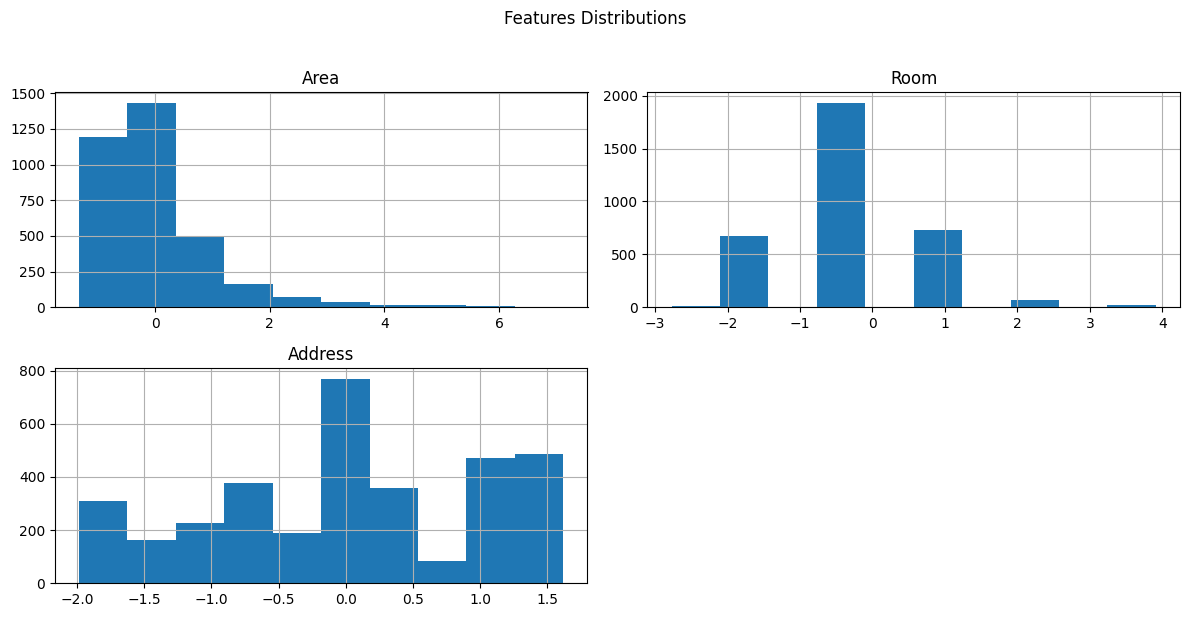

In [852]:
# Histogram of key features
hist_features = dfc[['Area', 'Room', 'Address']]
hist_features.hist(figsize=(12, 6))
plt.suptitle('Features Distributions', y=1.02)
plt.tight_layout()
plt.show()

/Users/sara/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<function matplotlib.pyplot.show(close=None, block=None)>

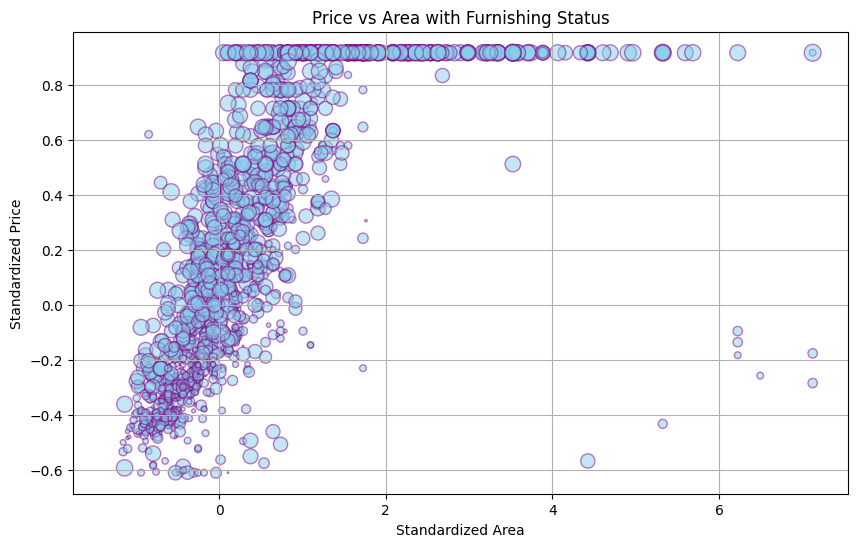

In [853]:
"""
Scatter Plot Analysis: Price vs Area with Furnishing Status

- Positive correlation: Larger areas generally correspond to higher prices.
- Address (point size) shows houses in more expensive ereas has more expensive prices.
- Outliers present: Some houses deviate from the trend, warranting further investigation.
"""

# Scatter plot : Area  vs Price
plt.figure(figsize=(10, 6))
sizes = dfc.Address*90 # Size based on furnishing status
plt.scatter(dfc.Area, dfc.Price, 
            s=sizes, alpha=0.5, 
            color='skyblue', 
            edgecolors='purple')
plt.title('Price vs Area with Furnishing Status')
plt.xlabel('Standardized Area')
plt.ylabel('Standardized Price')
plt.grid(True)
plt.show

Model Training

In [854]:
# Split data into train/test sets
msk = np.random.rand(len(dfc)) < 0.8
train = dfc[msk]
test = dfc[~msk]

Linear Regression Model

In [855]:
# Initialize and train model
Mlinear_regr = LinearRegression()
Mlinear_train_x = np.asanyarray(train[['Address','Area', 'Room', 'Parking','Warehouse', 'Elevator']])
Mlinear_train_y = np.asanyarray(train[['Price']])

Mlinear_regr.fit(Mlinear_train_x, Mlinear_train_y)

# Model coefficients
print("Linear Regressiob Results:")
print ('Coefficients: ', Mlinear_regr.coef_)
print(Mlinear_regr.intercept_)

Linear Regressiob Results:
Coefficients:  [[ 0.28898902  0.16929907  0.07542952 -0.02869844 -0.00426351  0.03300189]]
[-0.13565091]


Data Visualization
based of Coefficients, the importance of each factor has been shown.

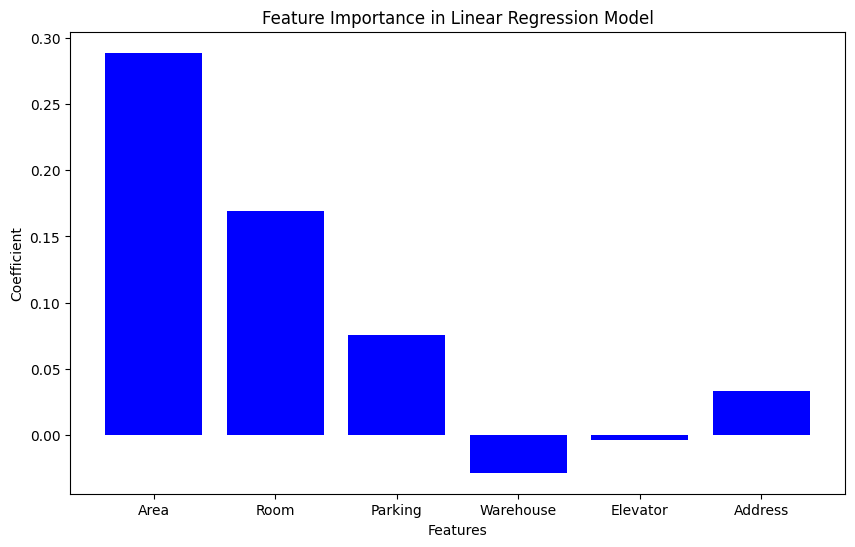

In [856]:
coefficients = Mlinear_regr.coef_[0]
features = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']

# Create a DataFrame to hold the feature names and their coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance in Linear Regression Model')
plt.show()

In [857]:
# Make Predictions and evaluate
Mlinear_test_x = np.asanyarray(test[['Address','Area', 'Room', 'Parking','Warehouse', 'Elevator']])
Mlinear_test_y = np.asanyarray(test[['Price']])
Mlinear_test_y_ = Mlinear_regr.predict(Mlinear_test_x)

print("Linear Regressiob Evaluation:")
print("Residual sum of squares: %.2f"
      % np.mean((Mlinear_test_y_ - Mlinear_test_y) ** 2))
print('Variance score: %.2f' % Mlinear_regr.score(Mlinear_test_x, Mlinear_test_y))

Linear Regressiob Evaluation:
Residual sum of squares: 0.04
Variance score: 0.83


Polynomial Regression Model

In [858]:
# Create polynomial regression pipeline
poly = PolynomialFeatures(degree=3)
Poly_train_x = poly.fit_transform(Mlinear_train_x)
Poly_train_x

array([[ 1.00000000e+00, -1.36117716e-01, -7.37905680e-01, ...,
         4.77120591e-02,  8.07655411e-02,  1.36717483e-01],
       [ 1.00000000e+00, -1.70288184e+00, -4.50069276e-01, ...,
         4.77120591e-02,  8.07655411e-02,  1.36717483e-01],
       [ 1.00000000e+00, -1.49523841e+00, -1.62232872e-01, ...,
         4.77120591e-02,  8.07655411e-02,  1.36717483e-01],
       ...,
       [ 1.00000000e+00, -1.89164861e+00, -5.22028377e-01, ...,
        -2.09590619e+01, -1.23815180e+01, -7.31435350e+00],
       [ 1.00000000e+00,  1.43064641e+00,  1.76648798e-02, ...,
         4.77120591e-02,  8.07655411e-02,  1.36717483e-01],
       [ 1.00000000e+00, -1.89164861e+00, -3.96099950e-01, ...,
         4.77120591e-02,  8.07655411e-02,  1.36717483e-01]])

In [859]:
dfp = LinearRegression()
poly_train_y_ = dfp.fit(Poly_train_x, Mlinear_train_y)
print(dfp.coef_)
print(dfp.intercept_)

[[ 1.68695574e-17  1.73525591e-01  1.92294186e-01 -1.19840035e-02
   2.04366765e-03  2.64038486e-06  2.13850599e-03  4.05247910e-02
   1.87620399e-01 -2.05647705e-02  7.68977769e-02  5.18770453e-02
   8.27930447e-02 -9.39879636e-02  2.94691157e-02  9.29583943e-02
   5.71092649e-02  9.60240579e-02  4.13866254e-03 -7.63525540e-03
  -2.62615358e-03 -1.02843183e-02 -3.94785460e-03  1.41306809e-03
   2.99798361e-03 -7.87253978e-06  1.09236764e-04 -3.04948587e-03
   9.21929438e-03  1.01814689e-02 -9.57843620e-04  1.50012016e-03
   1.02206928e-03 -5.17730396e-03 -6.33100415e-02  1.70173879e-02
   3.73299764e-02 -1.42259889e-02 -5.75777685e-03 -3.42286268e-03
  -5.84884310e-03  1.25635448e-03  4.75837753e-03  2.49783249e-02
   4.17527856e-03  9.35412201e-03  1.88496151e-02 -5.68929770e-03
   5.54636259e-02  1.06947003e-02  9.62063050e-03 -1.13476382e-02
   7.89289923e-03  3.44948145e-04 -1.28660384e-02 -9.38472456e-03
  -8.00598856e-03  1.25387777e-02  1.27218251e-02  3.18210474e-03
   1.74141

<function matplotlib.pyplot.show(close=None, block=None)>

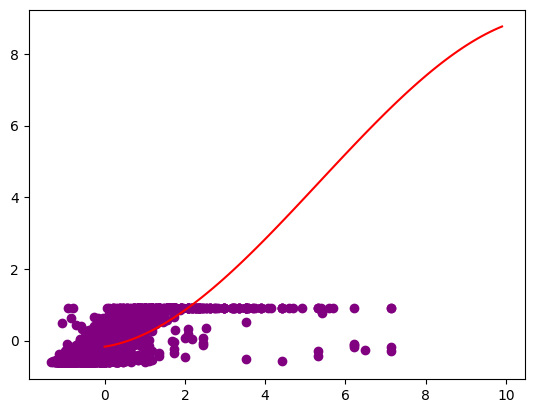

In [860]:
plt.scatter(train.Area, train.Price, color='purple')
X = np.arange(0.0, 10.0, 0.1)
Y = dfp.intercept_[0] + dfp.coef_[0][1]*X + dfp.coef_[0][2]*np.power(X, 2) + dfp.coef_[0][3]*np.power(X, 3)
plt.plot(X, Y, color='red')
plt.show

In [861]:
print("Polynomial Regression Evaluation:")
Poly_test_x = np.asanyarray(test[['Area']])
Poly_test_y = np.asanyarray(test[['Price']])

Poly_test_x = poly.fit_transform(Mlinear_test_x)
Poly_test_y_ = dfp.predict(Poly_test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Poly_test_y_ - Poly_test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Poly_test_y_ - Poly_test_y) ** 2))
print("R2-score: %.2f" % r2_score(Poly_test_y,Poly_test_y_ ) )

Polynomial Regression Evaluation:
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.02
R2-score: 0.90
